# **ResNet (Residual Networks) with PyTorch**

# Importing libraries

In [18]:
import torchvision.models as models
import torch
import torchvision     # for computer vision tasks like datasets & transformations
import torchvision.transforms as transforms     # for image preprocessing methods like normalization, resizing
import torch.nn as nn       # for nn layers & loss functions
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Device Selection (GPU or CPU)

In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Transformations

In [20]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

**transforms.Compose**: Chains several transformations.

**transforms.ToTensor()**: Converts images to tensors.

**transforms.Normalize((mean), (std))**: Normalizes the image tensor, here mean and std are both 0.5. For MNIST, the values are grayscale (single channel), so only one mean and std value is provided.

# Load MNIST dataset

In [21]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# DataLoader wraps the dataset to load data in batches (of size 4 here), with shuffling for training data.
# num_workers controls number of CPU workers (or processes) used to load data. 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Class Labels (for MNIST)

In [22]:
# MNIST has 10 classes (digits 0 to 9)
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# Building and Training the ResNet Model

In [23]:
# Loads ResNet-50 architecture without pretrained weights.
resnet = models.resnet50(pretrained=False, progress=True)
# Modify the first convolutional layer to accept 1 channel instead of 3
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet.to(device)

C:\Users\Noor\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Noor\AppData\Roaming\Python\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
# Loss Function and Optimizer
import torch.optim as optim
criterion = nn.CrossEntropyLoss()   # loss function for classification 
# to update model weights using Adam algorithm
optimizer = optim.Adam(resnet.parameters(), lr=0.001)

In [25]:
# training
for epoch in range(5):
    running_loss = 0.0
    # Fetches mini-batches of data (inputs and labels) from trainloader
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        # Resets gradients before each forward-backward pass
        optimizer.zero_grad()

        # Forward pass
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        # Backward pass
        loss.backward()
        # Updates model weights
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 1.939
[1,  4000] loss: 0.958
[1,  6000] loss: 1.138
[1,  8000] loss: 1.139
[1, 10000] loss: 1.228
[1, 12000] loss: 0.515
[1, 14000] loss: 0.481
[2,  2000] loss: 0.430
[2,  4000] loss: 0.314
[2,  6000] loss: 0.407
[2,  8000] loss: 0.259
[2, 10000] loss: 0.279
[2, 12000] loss: 0.262
[2, 14000] loss: 0.258
[3,  2000] loss: 0.222
[3,  4000] loss: 0.188
[3,  6000] loss: 0.182
[3,  8000] loss: 0.199
[3, 10000] loss: 0.214
[3, 12000] loss: 0.183
[3, 14000] loss: 0.146
[4,  2000] loss: 0.164
[4,  4000] loss: 0.148
[4,  6000] loss: 0.131
[4,  8000] loss: 0.134
[4, 10000] loss: 0.123
[4, 12000] loss: 0.132
[4, 14000] loss: 0.162
[5,  2000] loss: 0.105
[5,  4000] loss: 0.105
[5,  6000] loss: 0.140
[5,  8000] loss: 0.118
[5, 10000] loss: 0.102
[5, 12000] loss: 0.100
[5, 14000] loss: 0.115
Finished Training


# Displaying Image (Unnormalize and Plot)

In [26]:
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # Un-normalizes the image by reversing the normalization process
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

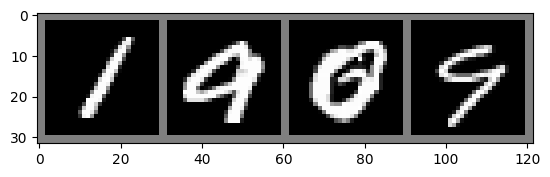

True labels:           1     9     0     9
Predicted labels:      1     9     0     9


In [29]:
# Get a batch of training data
dataiter = iter(trainloader)
images, labels = next(dataiter)

images, labels = images.to(device), labels.to(device)
# Perform a forward pass to get the model's predictions
outputs = resnet(images)
# Get the predicted labels by finding the index with the maximum score for each image
_, predicted = torch.max(outputs, 1)
images = images.cpu()
imshow(torchvision.utils.make_grid(images))
print('True labels:      ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
print('Predicted labels: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))
